## 1. Insert Data

In [1]:
import pandas as pd
import lale

/evo970/conda/ibmExp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
eeg_data_ns = pd.read_csv("eeg_data/NS_Patients.csv") 
eeg_data_mci = pd.read_csv("eeg_data/MCI_Patients.csv") 
eeg_data_ad = pd.read_csv("eeg_data/AD_Patients.csv") 

In [3]:
eeg_data_mci.head()

,Fp1_delta_mean,Fp1_theta_mean,Fp1_alpha_mean,Fp1_beta_mean,Fp1_gamma_mean,Fp2_delta_mean,Fp2_theta_mean,Fp2_alpha_mean,Fp2_beta_mean,Fp2_gamma_mean,...,Cz_delta_mean,Cz_theta_mean,Cz_alpha_mean,Cz_beta_mean,Cz_gamma_mean,Pz_delta_mean,Pz_theta_mean,Pz_alpha_mean,Pz_beta_mean,Pz_gamma_mean
0,20.542651,0.705713,0.836354,0.091580,0.007493,201.720657,1.296207,0.789881,0.139630,0.015759,...,1.800344,0.513284,0.430253,0.036421,0.000715,2.149954,0.309611,0.500757,0.056373,0.001153
1,6487.756844,16.534949,62.651283,1.411905,0.270824,9571.329376,19.825197,73.466148,0.834295,0.139957,...,29.103197,4.202695,13.766833,0.247697,0.037498,29.525625,4.517346,477.725460,0.274126,0.016335
2,217.265597,3.605637,1.813394,0.597569,0.050633,255.427884,3.963054,1.191277,0.343485,0.041133,...,6.361674,1.635707,1.792805,0.685027,0.002282,4.845258,1.005851,1.745586,0.879750,0.002258
3,485.103207,1.257670,0.585473,0.084236,0.030406,438.136372,1.451009,0.769387,0.183222,0.067228,...,1.547598,0.347247,0.991749,0.034641,0.000968,67.453410,1.425107,0.474067,0.039092,0.001238
4,155.388533,4.329504,356.222337,1.065358,0.104261,108.858912,3.697456,355.415163,43.686509,15.058494,...,4.909981,2.064989,230.058952,0.402920,0.004097,2.666534,1.060286,345.852941,0.880907,0.003029


Setting labels for the tree categories:
No Syndrome (NS) = 0
Mild Cognitive Impairment (MCI) = 1
Alzheimer's Disease (AD) = 2

In [4]:
eeg_data_ns['Label'] = eeg_data_ns.shape[0] * [0]
eeg_data_mci['Label'] = eeg_data_mci.shape[0] * [1]
eeg_data_ad['Label'] = eeg_data_ad.shape[0] * [2]
eeg_data_mci.head()

,Fp1_delta_mean,Fp1_theta_mean,Fp1_alpha_mean,Fp1_beta_mean,Fp1_gamma_mean,Fp2_delta_mean,Fp2_theta_mean,Fp2_alpha_mean,Fp2_beta_mean,Fp2_gamma_mean,...,Cz_theta_mean,Cz_alpha_mean,Cz_beta_mean,Cz_gamma_mean,Pz_delta_mean,Pz_theta_mean,Pz_alpha_mean,Pz_beta_mean,Pz_gamma_mean,Label
0,20.542651,0.705713,0.836354,0.091580,0.007493,201.720657,1.296207,0.789881,0.139630,0.015759,...,0.513284,0.430253,0.036421,0.000715,2.149954,0.309611,0.500757,0.056373,0.001153,1
1,6487.756844,16.534949,62.651283,1.411905,0.270824,9571.329376,19.825197,73.466148,0.834295,0.139957,...,4.202695,13.766833,0.247697,0.037498,29.525625,4.517346,477.725460,0.274126,0.016335,1
2,217.265597,3.605637,1.813394,0.597569,0.050633,255.427884,3.963054,1.191277,0.343485,0.041133,...,1.635707,1.792805,0.685027,0.002282,4.845258,1.005851,1.745586,0.879750,0.002258,1
3,485.103207,1.257670,0.585473,0.084236,0.030406,438.136372,1.451009,0.769387,0.183222,0.067228,...,0.347247,0.991749,0.034641,0.000968,67.453410,1.425107,0.474067,0.039092,0.001238,1
4,155.388533,4.329504,356.222337,1.065358,0.104261,108.858912,3.697456,355.415163,43.686509,15.058494,...,2.064989,230.058952,0.402920,0.004097,2.666534,1.060286,345.852941,0.880907,0.003029,1


In [5]:
eeg_data = pd.concat([eeg_data_ns, eeg_data_mci, eeg_data_ad])
#eeg_data.reset_index()

In [6]:
#eeg_schema = lale.datasets.data_schemas.dataframe_to_schema(eeg_data)

In [7]:
import sklearn.model_selection
train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(
    eeg_data.iloc[:,:-1], eeg_data.iloc[:,-1], test_size=0.3, random_state=2)

In [8]:
print(f'shape train_X {train_x.shape}, other_X {test_x.shape}')
print(f'shape train_y {train_y.shape}, other_y {test_y.shape}')

shape train_X (14, 95), other_X (6, 95)
shape train_y (14,), other_y (6,)


In [9]:
train_x.describe()

,Fp1_delta_mean,Fp1_theta_mean,Fp1_alpha_mean,Fp1_beta_mean,Fp1_gamma_mean,Fp2_delta_mean,Fp2_theta_mean,Fp2_alpha_mean,Fp2_beta_mean,Fp2_gamma_mean,...,Cz_delta_mean,Cz_theta_mean,Cz_alpha_mean,Cz_beta_mean,Cz_gamma_mean,Pz_delta_mean,Pz_theta_mean,Pz_alpha_mean,Pz_beta_mean,Pz_gamma_mean
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,3730.244349,13.464352,78.991546,0.714736,0.239068,3833.114439,18.332957,84.633018,3.596618,1.159442,...,11.948535,5.582722,37.412732,0.648875,0.005752,31.218625,5.714509,138.140514,0.371381,0.002754
std,5139.991473,12.711175,151.628452,0.799753,0.567776,3649.990752,15.189579,159.483660,11.548140,4.001948,...,17.896044,11.207075,74.863798,1.470950,0.009450,76.732823,13.138811,246.110861,0.443013,0.004084
min,20.542651,0.705713,0.272787,0.011664,0.001540,48.463112,0.575451,0.340451,0.016925,0.001293,...,0.542570,0.180787,0.047391,0.003098,0.000373,1.035453,0.119045,0.033510,0.003546,0.000234
25%,212.182121,2.493387,0.910265,0.103726,0.008134,575.399131,4.461487,0.848523,0.166030,0.024932,...,1.535387,1.080153,0.686615,0.040213,0.001629,2.957868,0.652399,0.755181,0.056686,0.000896
50%,1967.674771,13.046562,4.398761,0.400321,0.018158,3073.869956,17.134302,3.843961,0.295180,0.049800,...,4.246718,1.677033,3.089911,0.181690,0.003343,5.239015,0.970557,2.985558,0.138945,0.001484
75%,5699.824100,18.586949,48.911315,1.208227,0.096526,6208.435980,25.631005,57.847043,1.031787,0.127427,...,12.997549,3.968564,11.886179,0.316915,0.005677,17.368790,3.696513,225.042323,0.698340,0.003148
max,19219.587300,39.638199,467.012437,2.613357,2.119080,11178.088306,45.795603,495.053141,43.686509,15.058494,...,62.838827,43.369251,230.058952,5.527252,0.037498,293.985840,49.780020,786.674993,1.381905,0.016335


## 2. Creating LALE pipeline

In [10]:
import lale
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer as Norm
from sklearn.feature_selection import SelectKBest as FeatSel
from sklearn.ensemble import RandomForestClassifier as rf

from aix360.algorithms.lime import LimeTabularExplainer
from aix360.metrics import faithfulness_metric, monotonicity_metric
from aix360.algorithms.shap import KernelExplainer, TreeExplainer
import matplotlib.pyplot as plt
import shap

#uninterpretable algorithms
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC as SVM

from lale.lib.lale import Hyperopt, NoOp, ConcatFeatures
import lale.schemas as schemas
import lale.helpers
lale.wrap_imported_operators()

import os

#os.environ["PATH"] += os.pathsep + r"C:\Users\eovit\Miniconda3\envs\virt\Library\bin\graphviz"


import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/evo970/conda/ibmExp/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
The sklearn.svm.classes module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imported from sklearn.svm is now part of the private API.
The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
The sklearn.linear_model.passive_aggressive module is  deprecated in version 0.22 and will be re

### 2.1 Preprocessing steps

In [11]:
custom_PCA = PCA.customize_schema(n_components = schemas.Int(min = 1, max = 10))


### 2.2 Algorithms and corresponding Hyperparapeters pool

In [12]:
KNN = KNN.customize_schema(n_neighbors=schemas.Int(min=1, max=2))
#interpretable_pipeline = (Norm | NoOp | PCA)  >>  ( DecisionTreeClassifier | SVM | KNN)
#Removing SVM and KNN as they seen not to be able to generalize well new versions with 
#more generilizable Hyperparameters must be added to the pipeline
interpretable_pipeline = (Norm | NoOp | PCA)  >>  ( DecisionTreeClassifier)

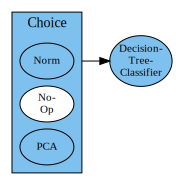

In [13]:
interpretable_pipeline.visualize()

### 2.3 Model Selection

In [14]:
#instantiating a hyper parapmeter optimization with a 2-Fold Cross Validation with max_evals 10
ip_train =  Hyperopt(estimator = interpretable_pipeline, cv = 2, max_evals = 1)

In [15]:
#
ip_trained = ip_train.fit(train_x, train_y)

100%|██████████| 1/1 [00:00<00:00,  1.13trial/s, best loss: -0.3571428571428571]


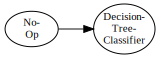

In [16]:
ip_trained.get_pipeline().visualize()

In [17]:
ip_trained.summary()

,tid,loss,time,log_loss,status
name,,,,,
p0,0,-0.357143,0.300486,NaN,ok


In [18]:
best = ip_trained.summary().loss.argmin()
worst = ip_trained.summary().loss.argmax()
print(f'The best pipeline is {best} and the worst pipeline is {worst}')

The best pipeline is 0 and the worst pipeline is 0


In [19]:
ip_trained.get_pipeline().pretty_print(ipython_display= True, show_imports= False)

```python
decision_tree_classifier = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.166529153009486, min_samples_split=3)
pipeline = NoOp() >> decision_tree_classifier
```

## 2.4 Performance Estimation of the best performing model

In [20]:
import sklearn.metrics

ip_y = ip_train.predict(test_x)
print(f'Best performing model has an accuracy of {sklearn.metrics.accuracy_score(test_y, ip_y):.1%}')

Best performing model has an accuracy of 50.0%


#### This was without any feature selection. 
In the data Feature Selection is dimmed as a must. That is because of the fact that feature generation generated far more features than we have rows and this creates issues as probable features that are counter productive exist (misleading the model) and more importantly the models can easily overfit and do very bad generalization (do bad when applied on the test set)

#### Now we will try to see if feature selection helps

## 3 Adding Feature Selection

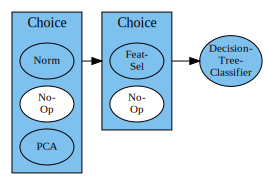

In [29]:

#Thgi pipeline is failing and i could not understand why
#nonlin_planned = (Norm | NoOp) >> (custom_PCA | NoOp) >> (FeatSel | NoOp) >> (SVM | KNN | DecisionTreeClassifier)


#Substituted with this instead
nonlin_planned = (Norm | NoOp | custom_PCA) >> (FeatSel | NoOp) >> (DecisionTreeClassifier)

nonlin_planned.visualize()

In [30]:
%%time
nonlin_trainable = Hyperopt(estimator = nonlin_planned, cv = 2, max_evals = 1)

CPU times: user 84.2 ms, sys: 4.13 ms, total: 88.3 ms
Wall time: 87.6 ms


In [31]:
%%time
nonlin_trained = nonlin_trainable.fit(train_x, train_y)

100%|██████████| 1/1 [00:01<00:00,  1.35s/trial, best loss: -0.5]
CPU times: user 1.94 s, sys: 7.6 ms, total: 1.95 s
Wall time: 1.94 s


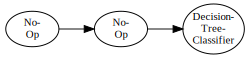

In [32]:
nonlin_trained.get_pipeline().visualize()

In [33]:
nonlin_trained.summary()

,tid,loss,time,log_loss,status
name,,,,,
p0,0,-0.5,0.47111,NaN,ok


In [34]:
nonlin_best = nonlin_trained.summary().loss.argmin()
nonlin_worst = nonlin_trained.summary().loss.argmax()

In [35]:
nonlin_trained.get_pipeline().pretty_print(ipython_display= True, show_imports= False)

```python
decision_tree_classifier = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.166529153009486, min_samples_split=3)
pipeline = NoOp() >> NoOp() >> decision_tree_classifier
```

In [36]:
nip_y = nonlin_trained.predict(test_x)
print(f'accuracy {sklearn.metrics.accuracy_score(test_y, nip_y):.1%}')

accuracy 83.3%


## Selecting a generizable model

In order to select a model that generalizes well we need to make the part 3 "Adding Feature Selection" a loop and average over performances for each model on the Test set. This way we will be able to pick the most generizable mode. Not selkecting a model from its accuracy on the training test rather on its Performance Estimation on the Testing set.Thus picking a model with its "True" Performance Estimation.


